# Comptabilité Réassureur

- Code Original : Guillaume 
- Révisé : Guillaume Gorge 5/6/23
- validé : le 14/6/23




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import math
from plotly import graph_objects as go
import json 
import seaborn as sns
import pandas_profiling
import sys


C:\Users\guill\AppData\Local\Temp\ipykernel_28052\52057984.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
## Python directory
### <--------------------------- TO BE CHANGED ---------------------------> ### 
PYTHON_DIRECTORY = 'https://github.com/ornikar/pricing-insurance/Shared Notebooks'
PYTHON_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Python Official Library/'
### <--------------------------- TO BE CHANGED ---------------------------> ### 


sys.path.insert(1, PYTHON_DIRECTORY)


from importlib import reload  # Python 3.4+
import OrnikarDataFormat
import TransformedDataReading
import LinkQuotations
import LeFuretLibrary
import GraphicStatLibrary
import AccountingFunctions

# instruction pour forcer la relecture d'une base (utile quand on code ;) 
# LeFuretLibrary = reload(LeFuretLibrary)
# GraphicStatLibrary = reload(GraphicStatLibrary)

In [3]:
# Définition du mode de lecture / écriture des base : 
ModeGlobal = True # True or False : True pour tout lire
ModeSpeed = 'Full' # 'Full' means to keep all variables at the expense of Speed. Put 'Quick' instead
periodLeFuret =  '2023-03' # mois le Furet à lire
if ModeGlobal and ModeSpeed == 'Full':
    print("Full reading of BigQuery and all DataBases")
    mode = 'Google' 
    SizeVariablesKeptGW = 'Full' # We keep all the variables of GW except var_to_suppress.
elif ModeGlobal:
    print("Fast Mode through limited selection of variables - good for Clementine")
    mode = 'Google' 
    SizeVariablesKeptGW = 'Quick' # We keep all the variables of GW except var_to_suppress.
else: 
    mode = 'ReadLocalBase'
    SizeVariablesKeptGW = 'Full'


Full reading of BigQuery and all DataBases


In [4]:

# Import the data base

### <--------------------------- TO BE CHANGED ---------------------------> ### 
BASE_PATH = 'C:/Users/guill/GitHub/2023 Ornikar Empreinte/Data' 
BASE_PATH_LEFURET = 'C:/Users/guill/GitHub/2023 Coherence Tarifaire/Data' 
BASE_PATH_RES = 'C:/Users/guill/GitHub/2023 Ornikar Empreinte/Results' 
### <--------------------------- TO BE CHANGED ---------------------------> ### 


In [5]:

# Accounting Variables : 

# Years we want accounting on
AccountingYear = [2023,2024]

PeriodRange =["{0}-{1:02}".format(year, month+1) for year in AccountingYear for month in range(12)]

# PeriodRange plus courte pour simplifier les calculs. Attention, mettre au minimum un an post dernière police souscrite pour calculer proprement les primes acquises
#PeriodRange =['2023-04','2023-05','2023-06','2023-07']
#display(PeriodRange)

In [6]:
## Variables to Keep Guidewire

# Liste Clémentine
var_process = ['account_id',  'account_number', 'submission_created_at', 'bind_date',  'job_id',  'job_number', 'policy_id',  'policy_number', 'tariff_viewed', 'wakam_called', 'tariff_accepted', 'wakam_pricing_version',
                'generation_source', 'online_offline' ]
var_risk = ['ph_email', 'loss_history_type', 'recommended_package', 'package_subtype', 'md_age', 'md_license_duration', 'vh_age',  'md_prefix',  'md_crm_coefficient', 'md_license_country', 'vh_sra_code', 'vh_license_plate','vh_annual_km','PACKAGE', ]  
# if SizeVariablesKeptGW = 'Full' alors à ces variables sont ajoutées TOUTES les variables sauf var_to_suppress
var_to_suppress = ['vh_sra_code','Unnamed: 0', 'insurer_name','submission_creation_user_name','update_user_id','ph_first_name','ph_last_name','ph_email','ph_phone'
] # vh_sra_code est en doublon

# Liste Guillaume 
var_process = ['account_id',  'account_number', 'submission_created_at', 'bind_date',  'job_id',  'job_number', 'policy_id',  'policy_number', 'tariff_viewed', 'wakam_called', 'tariff_accepted', 'policy_status', 'wakam_pricing_version',
                'generation_source', 'online_offline' ]
var_risk = [ 'loss_history_type', 'recommended_package', 'package_subtype', 'md_age', 'md_license_duration', 'vh_age',  'md_prefix',  'md_crm_coefficient', 'md_license_country', 'vh_sra_code', 'vh_license_plate','vh_annual_km','PACKAGE', ]  

# suppression 'ph_gender' et remplacement par md_prefix

var_premium = ['total_premium_rpt','total_cost_rpt']


In [7]:
# Aurelia, thibault, Lauria

# Reading db

### Reading Policy database in order to sort policy by type

In [8]:
## Read either data base located on the computer (mode = 'ReadLocalBase') or through Google Big Query directly with the update of local data base (option = "Google")


df, df_previous_claims, df_previous_insurers, df_previous_terminations, df_previous_license_cancellations_suspensions  = TransformedDataReading.GoogleAllDataBaseReading(mode=mode, BASE_PATH =BASE_PATH)
# df[(df['policy_number'])=='ONK0012420-W'].T

c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has 

### Reading Accounting

In [9]:
dfAccounting = TransformedDataReading.TransformDataGlobalReading(GoogleTableToRead = 'transformed-data.mart_insurance.mart_invoices',Stat=True)

c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)



                SELECT *
                FROM `transformed-data.mart_insurance.mart_invoices`
                
 
            


In [10]:
# Formatting Data 
OrnikarDataFormat = reload(OrnikarDataFormat)
dfFormat = OrnikarDataFormat.FormatGuideWire(df=df[df['period_status']=='Bound'])
dfFormat.shape

['submission_created_at', 'job_close_date', 'bind_date', 'issue_date', 'cancellation_date', 'original_effective_date', 'period_start', 'period_end', 'creation_date', 'update_date', 'price_computed_at', 'written_date', 'policy_period_start', 'policy_period_end']


(2611, 179)

In [11]:
# Definition de var_other qui contient toutes les variables qui n'ont pas été explicitement rejetées dans var_suppress
from itertools import chain
var_other = [col for col in df.columns if col not in list(chain(var_process, var_risk, var_premium ,var_to_suppress,['account_id', 'submission_created_at']))  ]
for col in var_other:
    if col == 'vh_sra_code':print('probleme')
    if col == 'account_id':print('problème')
    if col == 'md_license_country':print(col)
print('liste var_others')
print(var_other)

liste var_others
['policy_period_public_id', 'policy_public_id', 'sf_external_contact_id', 'policy_term_public_id', 'wakam_quote_id', 'wakam_price_test', 'wakam_price_test_perc_applied', 'job_type', 'job_public_id', 'job_close_date', 'issue_date', 'cancellation_date', 'cancellation_nature', 'sf_submission_id', 'sf_opportunity_id', 'original_effective_date', 'period_start', 'period_end', 'period_id', 'creation_date', 'update_date', 'price_computed_at', 'last_policy_period_id', 'product_code', 'policy_term_id', 'risk_type', 'written_date', 'submission_creation_user_id', 'submission_creation_user_email', 'is_from_aggregator', 'is_anonymous', 'session_id', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_term', 'utm_content', 'policy_risk_profile', 'policy_risk_profile_edu', 'has_formulas', 'has_selected_formula', 'account_public_id', 'ph_prefix', 'ph_birthdate', 'md_property_owner_type', 'md_accommodation_type', 'phc_policy_contact_role_public_id', 'phc_sf_external_contact_id', 'md_driver

In [12]:
# Base SRA
df_SRA = pd.read_csv(f'{BASE_PATH}/Wakam_vehiculier_auto 04-2023 (dwld PlugPlay).csv', sep=';',low_memory=False)
# On récupère les 3 variables SRA manquantes (classe, poids véhicule vide, puissance DIN)
df_SRA = df_SRA[['SRAIdentifiant','Classe','PoidsASec','PuissanceReelleMaxiDINenCv']]
# Ajout de variables comme le vehicule Ratio
df_SRA = OrnikarDataFormat.FormatSRA(df_SRA,Stat=False)

In [13]:
# Merge of all the Databases of GuideWire into a unique One
OrnikarDataFormat = reload(OrnikarDataFormat)
#display(df,df_SRA,df_previous_claims,df_previous_insurers,df_previous_terminations,df_previous_license_cancellations_suspensions) 
BaseQuotation = OrnikarDataFormat.mergeBaseGuideWire(dfFormat,df_SRA,df_previous_claims,df_previous_insurers,df_previous_terminations,df_previous_license_cancellations_suspensions,Stat=True)
#pandas_profiling.ProfileReport(BaseQuotation, minimal=True)


segment marketing


,segment
3. Standard,1075
2. Jeune permis - > 21 ans,800
4. Sans Antécédent,577
1. Jeune permis - 18-21 ans,159


segment Reinsurer


,ReinsurerSegment
3. Standard,1075
2. Young Driver with No EduScore,582
4. Interrupted,577
1a. Young Driver with EduScore (Good),278
1b. Young Driver with EduScore (bad),99


Output Database with 2611 lines and 208 Columns


In [14]:
# Ajout des variables TrainTest (random) et WeekAkur8 (à partir de variableDate mis en format Week depuis le début de l'activité d'ornikar)
BaseQuotation = GraphicStatLibrary.AjoutVariableAkur8(df=BaseQuotation,variableDate='submission_created_at',test_size=0.2,Stat=False)



In [15]:
Stat=BaseQuotation[['WeekAkur8','ReinsurerSegment','TrainTest']].groupby(by=['WeekAkur8','ReinsurerSegment'], as_index=False).count()
Stat.pivot(index="WeekAkur8", columns="ReinsurerSegment", values="TrainTest")

ReinsurerSegment,1a. Young Driver with EduScore (Good),1b. Young Driver with EduScore (bad),2. Young Driver with No EduScore,3. Standard,4. Interrupted
WeekAkur8,,,,,
0,NaN,NaN,6.0,6.0,3.0
1,NaN,NaN,21.0,20.0,7.0
2,NaN,NaN,19.0,41.0,21.0
3,NaN,NaN,40.0,94.0,52.0
4,12.0,NaN,41.0,82.0,84.0
5,19.0,7.0,34.0,67.0,33.0
6,14.0,12.0,36.0,72.0,32.0
7,21.0,14.0,46.0,85.0,42.0
8,36.0,11.0,59.0,117.0,73.0


### Reading Claims

In [16]:
TransformedDataReading = reload(TransformedDataReading)

dfClaims = TransformedDataReading.TransformDataGlobalReading(GoogleTableToRead = 'mart_insurance.intm_claims_aikan',Stat=True) 
#dfClaims[(dfClaims['claim_id']=='SONK2300006')].T
 
#print(list(dfAccounting.account_number)[0:5] ) # Print 5 number_account for validation

c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)



                SELECT *
                FROM `mart_insurance.intm_claims_aikan`
                
 
            


### Add policy to claims

In [17]:
def AddDataBasePolicytoClaims(dfClaims, df,Stat=True):

    dfClaims = dfClaims.merge(df,how='left', left_on="policy_name", right_on="policy_number")
    #dfClaims['claim_date'] = pd.to_datetime(dfClaims['claim_date']).dt.date

    if Stat:
        print(dfClaims.shape)
        print('total Sum of Claims  :{:7.0f}'.format(dfClaims['cost'].sum()))
    return dfClaims


dfClaimsWithPolicy = AddDataBasePolicytoClaims(dfClaims=dfClaims, df=BaseQuotation[['policy_number','policy_id','ReinsurerSegment','segment','policy_period_start','vh_purchase_date']])



(42, 45)
total Sum of Claims  :  30564


In [18]:
dfClaimsWithPolicy[(dfClaimsWithPolicy['nature'].isin(['MAT/CORP','CORPOREL']))].head(30).T
#dfClaimsWithPolicy['accident_type'].value_counts()

,19,34,39
claim_id,SONK2300042,SONK2300027,SONK2300034
policy_name,ONK0013120-W,ONK0012067-W,ONK0012144-W
insurer_name,WAKAM,WAKAM,WAKAM
insurer_ref,,,
insurer_policy,,,
status,OUVERT,OUVERT,OUVERT
phase,OUVERTURE,EXPERTISE EN COURS,EXPERTISE EN COURS
pec,PAS DE PRISE EN CHARGE,TOTALE,TOTALE
is_assistance_requested,False,True,False
nature,MAT/CORP,MAT/CORP,MAT/CORP


### Fraud detection

In [19]:
dfClaimsWithPolicy.columns

Index(['claim_id', 'policy_name', 'insurer_name', 'insurer_ref',
       'insurer_policy', 'status', 'phase', 'pec', 'is_assistance_requested',
       'nature', 'date_opened', 'date_closed', 'date_reopened',
       'closing_reason', 'claim_type', 'claim_date', 'claim_time',
       'claim_zipcode', 'claim_city', 'claim_country', 'is_claim_abroad',
       'convention', 'irsa_irca_case', 'responsibility', 'accident_type',
       'travel_reason', 'is_major_event', 'major_event_serial', 'is_vei',
       'is_roulant', 'kilometrage', 'delegation', 'gestionnaire_name',
       'insured_zipcode', 'insured_vehicle_immatriculation', 'paid',
       'recovered', 'reserved', 'cost', 'policy_number', 'policy_id',
       'ReinsurerSegment', 'segment', 'policy_period_start',
       'vh_purchase_date'],
      dtype='object')

In [20]:
def IndicatorFraud(dfClaims):
    # change in Date format
    Listvariable = ['claim_date','policy_period_start','date_opened']
    for variable in Listvariable:
                dfClaims[variable] =  pd.to_datetime(dfClaims[variable]).dt.date 
 

    dfClaims['claim_date'].mask(dfClaims['claim_date'].isna(),other=dfClaims['date_opened'],inplace=True)

    dfClaims['CommentAnalysisClaims'] =''

 
    dfClaims['IndClaimsClose2Uwt'] = (dfClaims['claim_date']-dfClaims['policy_period_start'])
    dfClaims['CommentAnalysisClaims'] =  dfClaims['CommentAnalysisClaims'].mask((pd.to_numeric(dfClaims['IndClaimsClose2Uwt']/np.timedelta64(1, 'D')) <5),dfClaims['CommentAnalysisClaims']+'Close to purchase date : check Carte Grise')
    
    dfClaims['IndClaimsLate'] = (dfClaims['date_opened']-dfClaims['claim_date'])
    dfClaims['CommentAnalysisClaims'] =  dfClaims['CommentAnalysisClaims'].mask((pd.to_numeric(dfClaims['IndClaimsLate']/np.timedelta64(1, 'D')) >10),dfClaims['CommentAnalysisClaims']+' - Late Claims')

    dfClaims['CommentAnalysisClaims'] =  dfClaims['CommentAnalysisClaims'].mask(dfClaims['accident_type'].isin(['ACC 2 VTM SANS TIERS IDENTIFIÉ (DELIT DE FUITE)','CHOC ANIMAL SAUVAGE']),dfClaims['CommentAnalysisClaims']+' - No identified Third Party - Cover only if Tout Risque')
 
    # claims with a policy with several submissions
    PricingWatchPolicy = pd.read_csv(f'{BASE_PATH_RES}/List Pricing Watch.csv').drop(columns='Unnamed: 0')
    dfClaims =dfClaims.merge(PricingWatchPolicy,how='left', on =['policy_id'] )
    dfClaims['CommentAnalysisClaims'] =  dfClaims['CommentAnalysisClaims'].mask((dfClaims['counts'] >10),dfClaims['CommentAnalysisClaims']+' - lots of submissions - indicator of potential Fraud at UW')
 
    display(dfClaims[['policy_name','policy_id','IndClaimsClose2Uwt','IndClaimsLate','claim_date','date_opened','policy_period_start','date_opened','status','pec','vh_purchase_date','ReinsurerSegment','segment','CommentAnalysisClaims']][(dfClaims['status']=='OUVERT')&(dfClaims['CommentAnalysisClaims']!='')])



IndicatorFraud(dfClaims=dfClaimsWithPolicy)

,policy_name,policy_id,IndClaimsClose2Uwt,IndClaimsLate,claim_date,date_opened,policy_period_start,date_opened,status,pec,vh_purchase_date,ReinsurerSegment,segment,CommentAnalysisClaims
15,ONK0012689-W,80031,5 days,17 days,2023-06-10,2023-06-27,2023-06-05,2023-06-27,OUVERT,AVEC FRANCHISE,2023-06-05,4. Interrupted,4. Sans Antécédent,- Late Claims
17,ONK0013249-W,158069,9 days,2 days,2023-06-25,2023-06-27,2023-06-16,2023-06-27,OUVERT,PAS DE PRISE EN CHARGE,2023-06-09,3. Standard,3. Standard,- No identified Third Party - Cover only if T...
23,ONK0012420-W,52056,1 days,1 days,2023-06-01,2023-06-02,2023-05-31,2023-06-02,OUVERT,PRISE EN CHARGE RÉSERVÉE,2023-05-31,1a. Young Driver with EduScore (Good),2. Jeune permis - > 21 ans,Close to purchase date : check Carte Grise
31,ONK0011800-W,27544,2 days,22 days,2023-05-11,2023-06-02,2023-05-09,2023-06-02,OUVERT,UNIQUEMENT DOMMAGES TIERS,2023-05-09,4. Interrupted,4. Sans Antécédent,Close to purchase date : check Carte Grise - L...
35,ONK0012836-W,100619,3 days,1 days,2023-06-11,2023-06-12,2023-06-08,2023-06-12,OUVERT,PRISE EN CHARGE RÉSERVÉE,2023-06-08,3. Standard,3. Standard,Close to purchase date : check Carte Grise
37,ONK0012012-W,35644,1 days,1 days,2023-05-18,2023-05-19,2023-05-17,2023-05-19,OUVERT,PRISE EN CHARGE RÉSERVÉE,2023-05-10,4. Interrupted,4. Sans Antécédent,Close to purchase date : check Carte Grise
39,ONK0012144-W,41525,31 days,3 days,2023-06-23,2023-06-26,2023-05-23,2023-06-26,OUVERT,TOTALE,2023-05-23,3. Standard,3. Standard,- No identified Third Party - Cover only if T...


### Accounting calculus

https://elearning.londonschoolofinsurance.com/pdf/en/Basic_Technical_Reinsurance_Accounting.pdf


In [21]:


AccountingFunctions=reload(AccountingFunctions)


Accounting = AccountingFunctions.PolicyAccountingPerMonth(dfAccounting,periodrange=PeriodRange)

# Account Number with cancellation : 2276890108

montants initiaux


,Value
Premium_HT_paid_to_Insurer,919614.50
invoice_amount,1571914.75
Premium_HT,1120573.25


(580320, 88)

(580320, 94)

(580320, 101)

,Value
Written_Premium_HT_paid_to_Insurer,919614.49032
Earned_Premium_HT_paid_to_Insurer,919614.49032
Written_Exposure,2611.00000
Net_written_Exposure,2145.00000
Earned_Exposure,2611.00000


(307767, 102)

,accounting_period,Written_Exposure,Net_written_Exposure,Earned_Exposure,Written_Premium_HT_paid_to_Insurer,Earned_Premium_HT_paid_to_Insurer
0,2023-04,330.0,140.0,63.097419,70669.390115,2904.458530
1,2023-05,870.0,702.0,243.414187,294510.099971,22208.430595
2,2023-06,1411.0,1303.0,295.815152,554435.000234,51844.874600
3,2023-07,0.0,0.0,168.697900,0.000000,71816.111281
4,2023-08,0.0,0.0,181.673973,0.000000,76591.816956
5,2023-09,0.0,0.0,176.060274,0.000000,74197.958571
6,2023-10,0.0,0.0,182.093151,0.000000,76760.653421
7,2023-11,0.0,0.0,176.301370,0.000000,74330.732078
8,2023-12,0.0,0.0,182.178082,0.000000,76808.423147
9,2024-01,0.0,0.0,182.178082,0.000000,76808.423147


In [22]:
# Validation of Accounting DataBase

AccountingFunctions.AccountingValidation(Accounting=Accounting,dfAccounting=Accounting,df=df, )
#AccountingValidation(Accounting=Accounting,dfAccounting=dfAccounting,df=df,variableAccounting = ['policy_number','invoice_number','policy_period_payment_plan','invoice_id','Premium_HT_paid_to_Insurer','invoice_amount','Premium_HT','policy_period_effective_date','policy_period_expiration_date','policy_period_cancellation_date','policy_period_bound_date','bill_date','update_time',])
#display(Accounting[(Accounting['policy_period_cancellation_date'].notna())])
#display(Accounting[(Accounting['account_number']=='8360631137')])


0 Potential policies with issue
0 Potential quittances with issue


#### Formatting Premium for Reinsurer

In [23]:
AccountingFunctions=reload(AccountingFunctions)
# period is the date used for calculation of Unearned Premium : all the periods after it are not retained but used to calculate unearned Premium

dfStat= AccountingFunctions.AccountingReinsurer(Accounting=Accounting ,df=BaseQuotation, period='2023-06',Stat=True)

['ReinsurerSegment', 'accounting_period', 'DayDate', 'Written_Exposure', 'Net_written_Exposure', 'Earned_Exposure', 'Written_Premium_HT_paid_to_Insurer', 'Earned_Premium_HT_paid_to_Insurer']
['accounting_period', 'DayDate', 'ReinsurerSegment']


,accounting_period,DayDate,ReinsurerSegment,Written_Exposure,Net_written_Exposure,Earned_Exposure,Written_Premium_HT_paid_to_Insurer,Earned_Premium_HT_paid_to_Insurer,Unearned_Premium_HT_paid_to_Insurer
0,2023-04,2023-06-28,2. Young Driver with No EduScore,86.0,45.0,16.702127,30491.210049,1284.516123,NaN
1,2023-04,2023-06-28,3. Standard,161.0,71.0,32.235491,24063.680055,817.506468,NaN
2,2023-04,2023-06-28,4. Interrupted,83.0,24.0,14.159801,16114.500011,802.435940,NaN
3,2023-05,2023-06-28,1a. Young Driver with EduScore (Good),81.0,72.0,10.081717,40457.919925,1526.135462,NaN
4,2023-05,2023-06-28,1b. Young Driver with EduScore (bad),38.0,33.0,4.873973,20542.889975,619.814664,NaN
5,2023-05,2023-06-28,2. Young Driver with No EduScore,181.0,151.0,47.363836,85357.179950,6954.068360,NaN
6,2023-05,2023-06-28,3. Standard,358.0,280.0,107.162068,77571.219974,5795.734020,NaN
7,2023-05,2023-06-28,4. Interrupted,212.0,166.0,73.932593,70580.890147,7312.678089,NaN
8,2023-06,2023-06-28,1a. Young Driver with EduScore (Good),197.0,186.0,24.956639,94514.259892,6837.751298,126608.293056
9,2023-06,2023-06-28,1b. Young Driver with EduScore (bad),61.0,59.0,7.397693,34058.670047,2944.974169,51036.771189


In [24]:
# Calcul des Claims
AccountingFunctions=reload(AccountingFunctions)
AccountingdfClaim,dfStatClaims=AccountingFunctions.ClaimsAccountingPerMonth(data=dfClaimsWithPolicy,periodrange=PeriodRange,varSegmentation=['ReinsurerSegment'])

montants initiaux


,Value
paid,189.860001
recovered,0.000000
reserved,30374.041016
cost,30563.900391


,accounting_period,ReinsurerSegment,NbrClaims,TotalClaimsCost,TotalClaimsffReserve,ClosedFile,TotalClosedFileCost,BIFile,TotalBIClaimsCost,TotalBIClaimsffReserve,WindScreenFile,TotalWindScreenClaimsCost
0,2023-01,1a. Young Driver with EduScore (Good),0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
1,2023-01,1b. Young Driver with EduScore (bad),0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
2,2023-01,2. Young Driver with No EduScore,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
3,2023-01,3. Standard,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
4,2023-01,4. Interrupted,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-12,1a. Young Driver with EduScore (Good),0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
116,2024-12,1b. Young Driver with EduScore (bad),0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
117,2024-12,2. Young Driver with No EduScore,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
118,2024-12,3. Standard,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0


30563.900016784668

Late Claims analysis


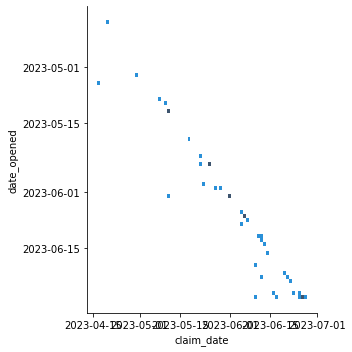

In [25]:
import seaborn as sns

print('Late Claims analysis')
sns.displot(data=dfClaimsWithPolicy, x="claim_date", y="date_opened")
#sns.displot(data=dfClaimsWithPolicy, x="delay")

In [26]:
# Merge Premium and Claims
dfStat = dfStat.merge(dfStatClaims, on=['accounting_period','ReinsurerSegment'],how='left')

In [27]:
# Extract to Ornikar Statistics for Reinsurer.xlsx. This Excel Spreadsheet is then called by Ornikar Statistics for Reinsurer Presentation.xlsx

with pd.ExcelWriter(f'{BASE_PATH_RES}/Ornikar Statistics for Reinsurer.xlsx') as writer:  
    dfStat.to_excel(writer, sheet_name='RAW_STAT')
 